In [40]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE




In [41]:
df = pd.read_csv("/workspaces/ml_techniques/src/datasets/enriched_student_academic_performance_dataset.csv")
df.head(5)

,Student_ID,Gender,Grade_Level,Study_Hours,Attendance (%),Exam_Score,Parent_Education,Satisfaction_Level,Extra_Curricular,Internet_Access,Daily_Screen_Time,Part_Time_Job,Health_Status
0,1001,Male,9,3.75,83,84,Master's,Neutral,No,No,7.79,No,Average
1,1002,Male,9,5.28,82,71,Master's,Very Satisfied,Yes,No,2.51,No,Average
2,1003,Male,12,5.37,92,67,High School,Unsatisfied,Yes,Yes,2.32,No,Average
3,1004,Male,9,3.81,80,68,Bachelor's,Satisfied,Yes,Yes,2.87,No,Excellent
4,1005,Female,10,3.36,65,49,Bachelor's,Neutral,Yes,Yes,4.05,No,Good


In [42]:
df.isnull().sum()

Student_ID            0
Gender                0
Grade_Level           0
Study_Hours           0
Attendance (%)        0
Exam_Score            0
Parent_Education      0
Satisfaction_Level    0
Extra_Curricular      0
Internet_Access       0
Daily_Screen_Time     0
Part_Time_Job         0
Health_Status         0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          1500 non-null   int64  
 1   Gender              1500 non-null   object 
 2   Grade_Level         1500 non-null   int64  
 3   Study_Hours         1500 non-null   float64
 4   Attendance (%)      1500 non-null   int64  
 5   Exam_Score          1500 non-null   int64  
 6   Parent_Education    1500 non-null   object 
 7   Satisfaction_Level  1500 non-null   object 
 8   Extra_Curricular    1500 non-null   object 
 9   Internet_Access     1500 non-null   object 
 10  Daily_Screen_Time   1500 non-null   float64
 11  Part_Time_Job       1500 non-null   object 
 12  Health_Status       1500 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 152.5+ KB


In [44]:
df.describe()


,Student_ID,Grade_Level,Study_Hours,Attendance (%),Exam_Score,Daily_Screen_Time
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000
mean,1750.500000,10.553333,3.010860,83.994000,74.86600,4.033880
std,433.157015,1.115939,1.458403,9.503377,14.33205,1.543274
min,1001.000000,9.000000,0.000000,52.000000,30.00000,1.000000
25%,1375.750000,10.000000,2.020000,77.750000,65.00000,2.937500
50%,1750.500000,11.000000,3.005000,84.000000,75.00000,3.980000
75%,2125.250000,12.000000,3.965000,91.000000,85.00000,5.100000
max,2500.000000,12.000000,8.000000,100.000000,100.00000,9.290000


In [45]:
df.drop(columns = ['Student_ID'], axis = 1, inplace = True)
df.head()

,Gender,Grade_Level,Study_Hours,Attendance (%),Exam_Score,Parent_Education,Satisfaction_Level,Extra_Curricular,Internet_Access,Daily_Screen_Time,Part_Time_Job,Health_Status
0,Male,9,3.75,83,84,Master's,Neutral,No,No,7.79,No,Average
1,Male,9,5.28,82,71,Master's,Very Satisfied,Yes,No,2.51,No,Average
2,Male,12,5.37,92,67,High School,Unsatisfied,Yes,Yes,2.32,No,Average
3,Male,9,3.81,80,68,Bachelor's,Satisfied,Yes,Yes,2.87,No,Excellent
4,Female,10,3.36,65,49,Bachelor's,Neutral,Yes,Yes,4.05,No,Good


In [46]:
# Encode categorical features
label_cols = ['Gender', 'Parent_Education', 'Satisfaction_Level', 
              'Extra_Curricular', 'Internet_Access', 'Part_Time_Job', 'Health_Status']

In [47]:
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,Gender,Grade_Level,Study_Hours,Attendance (%),Exam_Score,Parent_Education,Satisfaction_Level,Extra_Curricular,Internet_Access,Daily_Screen_Time,Part_Time_Job,Health_Status
0,1,9,3.75,83,84,2,0,0,0,7.79,0,0
1,1,9,5.28,82,71,2,3,1,0,2.51,0,0
2,1,12,5.37,92,67,1,2,1,1,2.32,0,0
3,1,9,3.81,80,68,0,1,1,1,2.87,0,1
4,0,10,3.36,65,49,0,0,1,1,4.05,0,2


In [48]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Manually remove encoded categorical columns
categorical_encoded = ['Gender', 'Parent_Education', 'Satisfaction_Level',
                       'Extra_Curricular', 'Internet_Access', 'Part_Time_Job', 'Health_Status']

true_numeric_cols = [col for col in numeric_cols if col not in categorical_encoded]
print(true_numeric_cols)


['Grade_Level', 'Study_Hours', 'Attendance (%)', 'Exam_Score', 'Daily_Screen_Time']


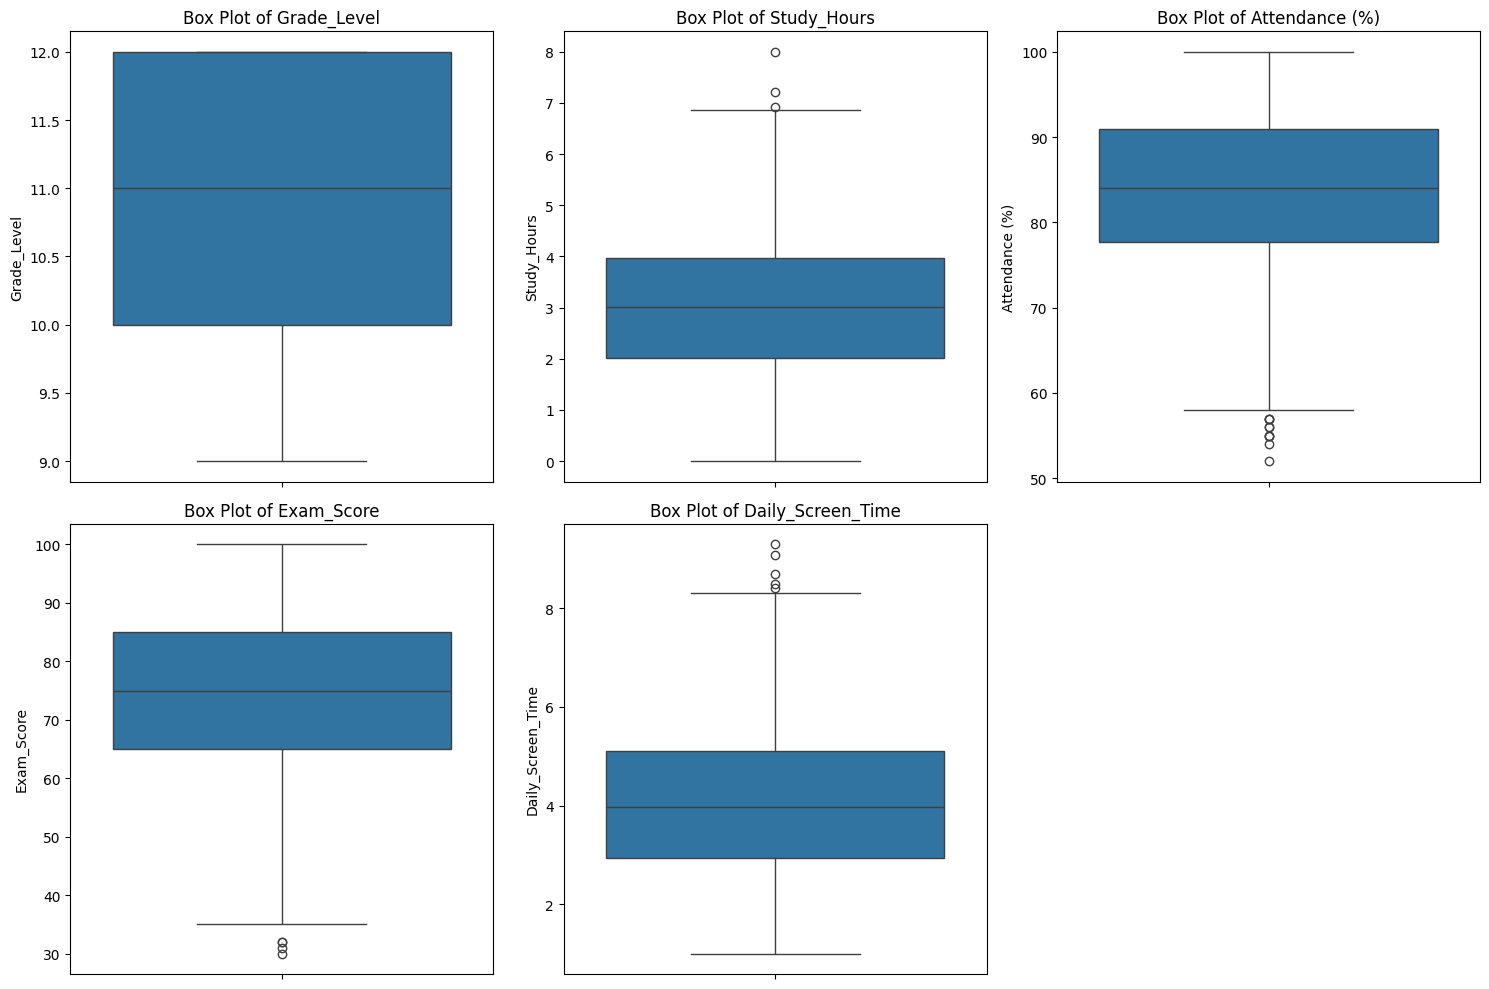

In [49]:
# Box Plots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(true_numeric_cols):
 plt.subplot(len(true_numeric_cols) // 3 + 1, 3, i + 1)
 sns.boxplot(y=df[col])
 plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

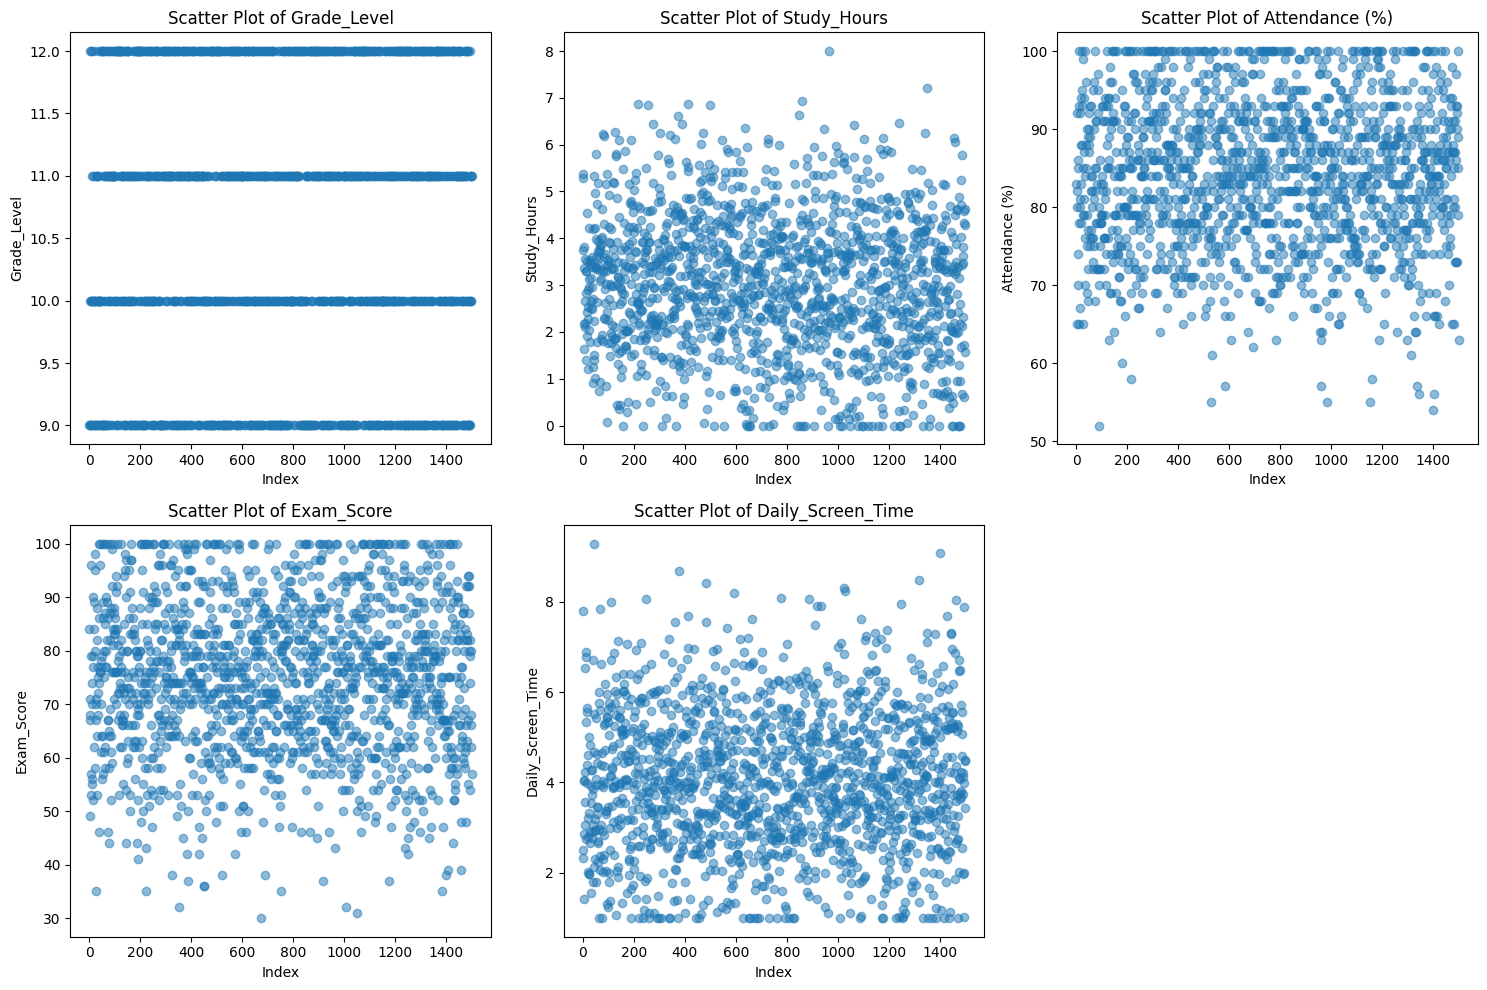

In [50]:
 # Scatter Plots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(true_numeric_cols):
 plt.subplot(len(true_numeric_cols) // 3 + 1, 3, i + 1)
 plt.scatter(range(len(df)), df[col], alpha=0.5)
 plt.title(f'Scatter Plot of {col}')
 plt.xlabel('Index')
 plt.ylabel(col)
plt.tight_layout()
plt.show()

In [51]:
df_zscore = df[(np.abs(zscore(df[true_numeric_cols])) < 3).all(axis=1)]
print(df_zscore)

      Gender  Grade_Level  Study_Hours  Attendance (%)  Exam_Score  \
0          1            9         3.75              83          84   
1          1            9         5.28              82          71   
2          1           12         5.37              92          67   
3          1            9         3.81              80          68   
4          0           10         3.36              65          49   
...      ...          ...          ...             ...         ...   
1495       1           11         0.61              89          66   
1496       0           11         4.32              85          80   
1497       1           10         1.56              79          68   
1498       1           10         4.29             100          62   
1499       0           11         4.62              63          57   

      Parent_Education  Satisfaction_Level  Extra_Curricular  Internet_Access  \
0                    2                   0                 0                0 

In [52]:
scaler_standard = StandardScaler()
df_standard = df.copy()
df_standard[true_numeric_cols] = scaler_standard.fit_transform(df[true_numeric_cols])
df_standard

,Gender,Grade_Level,Study_Hours,Attendance (%),Exam_Score,Parent_Education,Satisfaction_Level,Extra_Curricular,Internet_Access,Daily_Screen_Time,Part_Time_Job,Health_Status
0,1,-1.392416,0.506984,-0.104629,0.637525,2,0,0,0,2.434677,0,0
1,1,-1.392416,1.556426,-0.209890,-0.269835,2,3,1,0,-0.987763,0,0
2,1,1.296800,1.618158,0.842718,-0.549023,1,2,1,1,-1.110919,0,0
3,1,-1.392416,0.548138,-0.420412,-0.479226,0,1,1,1,-0.754415,0,1
4,0,-0.496011,0.239479,-1.999325,-1.805368,0,0,1,1,0.010449,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,0.400394,-1.646774,0.526936,-0.618820,1,0,1,1,-1.318339,0,3
1496,0,0.400394,0.897953,0.105892,0.358338,1,0,0,1,-1.953565,0,1
1497,1,-0.496011,-0.995160,-0.525673,-0.479226,2,0,1,1,0.302134,0,0
1498,1,-0.496011,0.877375,1.684805,-0.898008,0,3,1,0,-0.384947,0,3


In [53]:
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[true_numeric_cols] = scaler_minmax.fit_transform(df[true_numeric_cols])
df_minmax

,Gender,Grade_Level,Study_Hours,Attendance (%),Exam_Score,Parent_Education,Satisfaction_Level,Extra_Curricular,Internet_Access,Daily_Screen_Time,Part_Time_Job,Health_Status
0,1,0.000000,0.46875,0.645833,0.771429,2,0,0,0,0.819059,0,0
1,1,0.000000,0.66000,0.625000,0.585714,2,3,1,0,0.182147,0,0
2,1,1.000000,0.67125,0.833333,0.528571,1,2,1,1,0.159228,0,0
3,1,0.000000,0.47625,0.583333,0.542857,0,1,1,1,0.225573,0,1
4,0,0.333333,0.42000,0.270833,0.271429,0,0,1,1,0.367913,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,0.666667,0.07625,0.770833,0.514286,1,0,1,1,0.120627,0,3
1496,0,0.666667,0.54000,0.687500,0.714286,1,0,0,1,0.002413,0,1
1497,1,0.333333,0.19500,0.562500,0.542857,2,0,1,1,0.422195,0,0
1498,1,0.333333,0.53625,1.000000,0.457143,0,3,1,0,0.294331,0,3


In [54]:
X_unsupervised = df.drop(columns=['Exam_Score'], errors='ignore')  # Replace with your actual target column
# --- KMeans Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_unsupervised)
# Validation
sil_kmeans = silhouette_score(X_unsupervised, kmeans_labels)
db_kmeans = davies_bouldin_score(X_unsupervised, kmeans_labels)

print("🔹 KMeans Clustering")
print("Silhouette Score:", sil_kmeans)
print("Davies-Bouldin Score:", db_kmeans)


🔹 KMeans Clustering
Silhouette Score: 0.40202888475008847
Davies-Bouldin Score: 0.7964183233545844


In [55]:
# Assuming 'Exam_Score' is the target
target = df['Exam_Score']
features = df.drop(columns=['Exam_Score'])

In [56]:
# Compute mutual information
mi_scores = mutual_info_regression(features, target, random_state=42)
# Create a DataFrame to visualize
mi_df = pd.DataFrame({'Feature': features.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print("\n Mutual Information Scores:")
print(mi_df)


 Mutual Information Scores:
               Feature  MI Score
6     Extra_Curricular  0.022520
2          Study_Hours  0.016557
7      Internet_Access  0.007373
4     Parent_Education  0.005777
0               Gender  0.000000
1          Grade_Level  0.000000
3       Attendance (%)  0.000000
5   Satisfaction_Level  0.000000
8    Daily_Screen_Time  0.000000
9        Part_Time_Job  0.000000
10       Health_Status  0.000000


In [57]:
# Select top features (for example, top 5)
top_features = mi_df['Feature'].head(5).tolist()
print("\n Selected Top Features:", top_features)


 Selected Top Features: ['Extra_Curricular', 'Study_Hours', 'Internet_Access', 'Parent_Education', 'Gender']


In [58]:
selected_df = df[top_features + ['Exam_Score']]


In [59]:
# Step 1: Convert Exam_Score to binary class
median_score = selected_df['Exam_Score'].median()
selected_df['Score_Class'] = selected_df['Exam_Score'].apply(lambda x: 'High' if x >= median_score  else 'Low')


/tmp/ipykernel_6975/1344326805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Score_Class'] = selected_df['Exam_Score'].apply(lambda x: 'High' if x >= median_score  else 'Low')


In [60]:
# Step 2: Prepare X and y
X = selected_df.drop(columns=['Exam_Score', 'Score_Class'])
y = selected_df['Score_Class']

In [61]:
print(" Original Class Distribution:", Counter(y))

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


 Original Class Distribution: Counter({'High': 785, 'Low': 715})


In [62]:
# Technique 1: Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print("🔁 After Random Oversampling:", Counter(y_ros))

🔁 After Random Oversampling: Counter({'Low': 628, 'High': 628})


In [63]:
# ------------------
# Technique 2: SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(" After SMOTE:", Counter(y_smote))

 After SMOTE: Counter({'Low': 628, 'High': 628})


In [64]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

In [65]:
def evaluate_models(X_train, y_train, X_test, y_test, source):
    print(f"\n Results Using {source} Data")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n Model: {name}")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='weighted'))
        print("Recall:", recall_score(y_test, y_pred, average='weighted'))
        print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
evaluate_models(X_ros, y_ros, X_test, y_test, source="Random Oversampling")

# Train & Evaluate on SMOTE-balanced data
evaluate_models(X_smote, y_smote, X_test, y_test, source="SMOTE")


 Results Using Random Oversampling Data

 Model: Logistic Regression
Accuracy: 0.51
Precision: 0.5114082503556188
Recall: 0.51
F1 Score: 0.5102450680744651
Classification Report:
               precision    recall  f1-score   support

        High       0.53      0.50      0.52       157
         Low       0.49      0.52      0.50       143

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.51      0.51      0.51       300


 Model: Random Forest
Accuracy: 0.49
Precision: 0.49139224751066857
Recall: 0.49
F1 Score: 0.49025507085301473
Classification Report:
               precision    recall  f1-score   support

        High       0.51      0.48      0.50       157
         Low       0.47      0.50      0.48       143

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300


 Model: SVM
Accuracy: 0.5033